In [1]:
# Example of a typical exploratory data analysis (EDA) process
# and machine learning predictions with LinearRegression, RandomForestRegressor, GradientBoosting and Multi-layer Perceptron
# using Kaggle house prices data set: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# notebook is based on the article and codes provided on the following pages:
# https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
# https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
# https://www.kaggle.com/surya635/house-price-prediction

Steps for EDA:
1. oveview of the data:
  - with standard Pandas: df.shape, df.head(), df.info(), df.describe()
  - with extension pandas_profiling: df.profile_report()
2. cleaning data
  - check for & remove duplicates: df.drop_duplicates()
  - check for missing values: df.isnull().sum() => remove: df.dropna() or fill: df.fillna()
  - check for & remove outliers for target / numerical attributes: 
       df_num.hist() => remowe with, for example, Interquartile Range (IQR)
3. find the most important features for prediction
  - determine attributes correlations: df_num.corr(), sns.heatmap(), check correlations with the target attribute   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('train_hp.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
#import pandas_profiling 
#df.profile_report()

In [7]:
duplicated_rows = df[df.duplicated()]
print('number of duplicated rows:', duplicated_rows.shape[0])

number of duplicated rows: 0


In [8]:
#df = df.drop_duplicates()

In [9]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [10]:
# drop columns with > 1/4 missing values
df2 = df[[column for column in df if df[column].isnull().sum() / len(df) > 0.25]]
print("List of dropped columns:", end=' ')
for c in df2.columns:
    print(c, end=' | ')
    df.drop(c, axis=1, inplace = True) 

List of dropped columns: Alley | FireplaceQu | PoolQC | Fence | MiscFeature | 

In [11]:
# drop the missing values in remaining columns
df = df.dropna() 
df.count()

Id               1094
MSSubClass       1094
MSZoning         1094
LotFrontage      1094
LotArea          1094
                 ... 
MoSold           1094
YrSold           1094
SaleType         1094
SaleCondition    1094
SalePrice        1094
Length: 76, dtype: int64

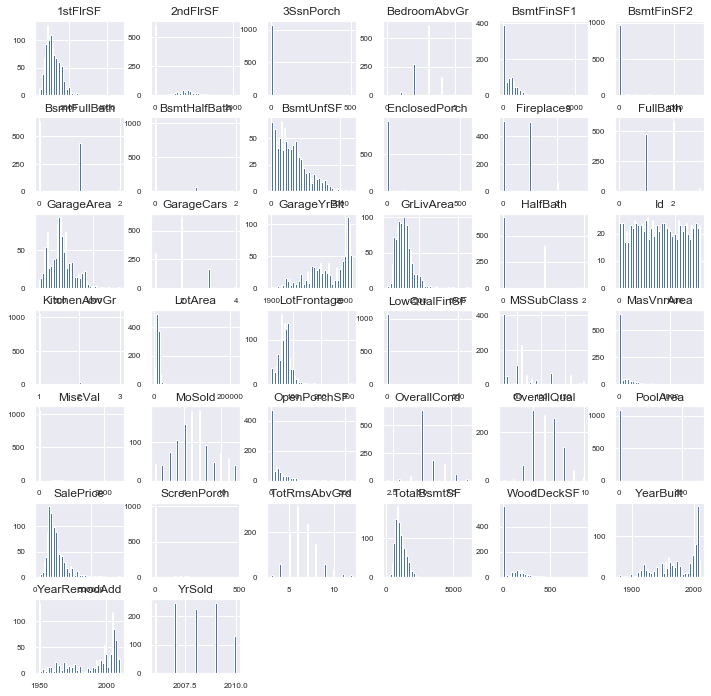

In [12]:
# check for outliers
df.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8);

In [13]:
# determining Interquartile Range (IQR): 3rd quartile (Q3) - 1st quartile (Q1) values
# for removing outliers with relationn: df < (Q1 - 1.5 * IQR) | (df > (Q3 + 1.5 * IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 727.25
MSSubClass          50.00
LotFrontage         20.00
LotArea           3780.50
OverallQual          2.00
OverallCond          1.00
YearBuilt           50.00
YearRemodAdd        38.00
MasVnrArea         171.75
BsmtFinSF1         712.75
BsmtFinSF2           0.00
BsmtUnfSF          576.00
TotalBsmtSF        529.50
1stFlrSF           519.50
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          615.00
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         242.50
WoodDeckSF         169.75
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        88500.00
dtype: float

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64


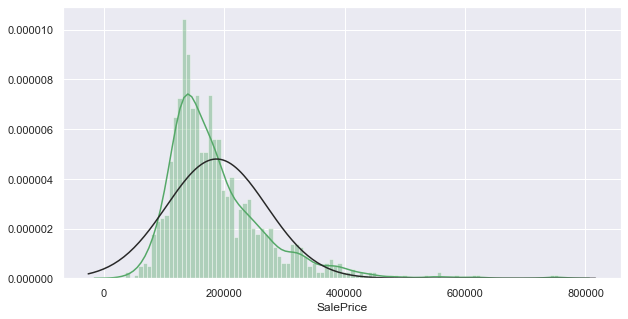

In [14]:
print(df['SalePrice'].describe())
plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4}, fit=stats.norm);

1044


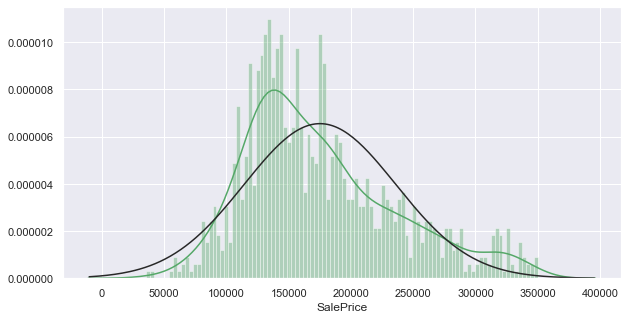

In [15]:
# remove outliers based on the targeted variable
c='SalePrice'
outlier_indexes_1 = df[ df[c] > (Q3[c] + 1.5 * IQR[c]) ].index    
outlier_indexes_2 = df[ df[c] < (Q1[c] - 1.5 * IQR[c]) ].index
df=df.drop(outlier_indexes_1)
df=df.drop(outlier_indexes_2)
print(df['Id'].count())
plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4}, fit=stats.norm);

In [16]:
# select numerical attributes 
df_num=df.select_dtypes(include=['int64','float64'])
len(df_num.columns)

38

In [17]:
# determine strongly correlated attributes with the target attribute
bord = 0.25
df_corr = df.corr()['SalePrice'][:-1] # -1 because the latest row is the target attribute
golden_features_list = df_corr[abs(df_corr) > bord].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 20 strongly correlated values with SalePrice:
OverallQual     0.793710
GrLivArea       0.654217
GarageCars      0.629710
FullBath        0.611144
GarageArea      0.595834
YearBuilt       0.570623
YearRemodAdd    0.565675
1stFlrSF        0.535824
TotalBsmtSF     0.533988
GarageYrBlt     0.530874
TotRmsAbvGrd    0.496458
Fireplaces      0.431732
MasVnrArea      0.362749
OpenPorchSF     0.361534
LotFrontage     0.318839
WoodDeckSF      0.313469
LotArea         0.302195
2ndFlrSF        0.288449
BsmtFinSF1      0.275302
HalfBath        0.250263
Name: SalePrice, dtype: float64


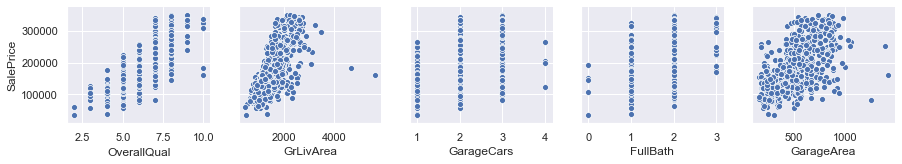

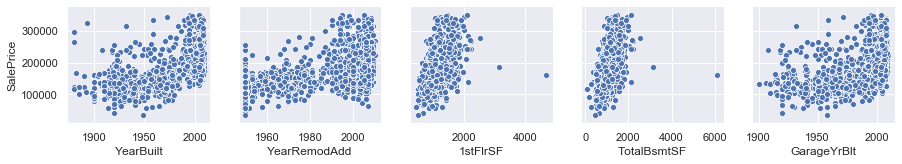

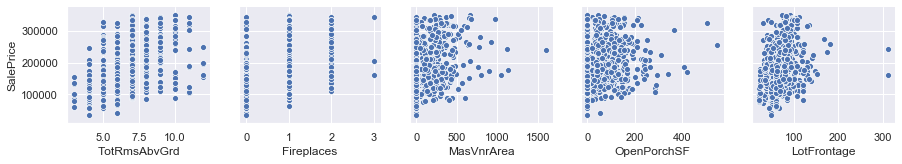

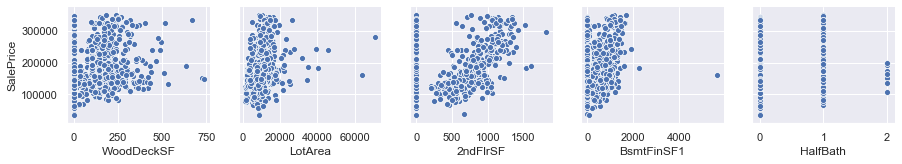

In [18]:
features=golden_features_list.to_frame().transpose()
for i in range(0, len(features.columns), 5):
    sns.pairplot(data=df, x_vars=features.columns[i:i+5], y_vars=['SalePrice'])

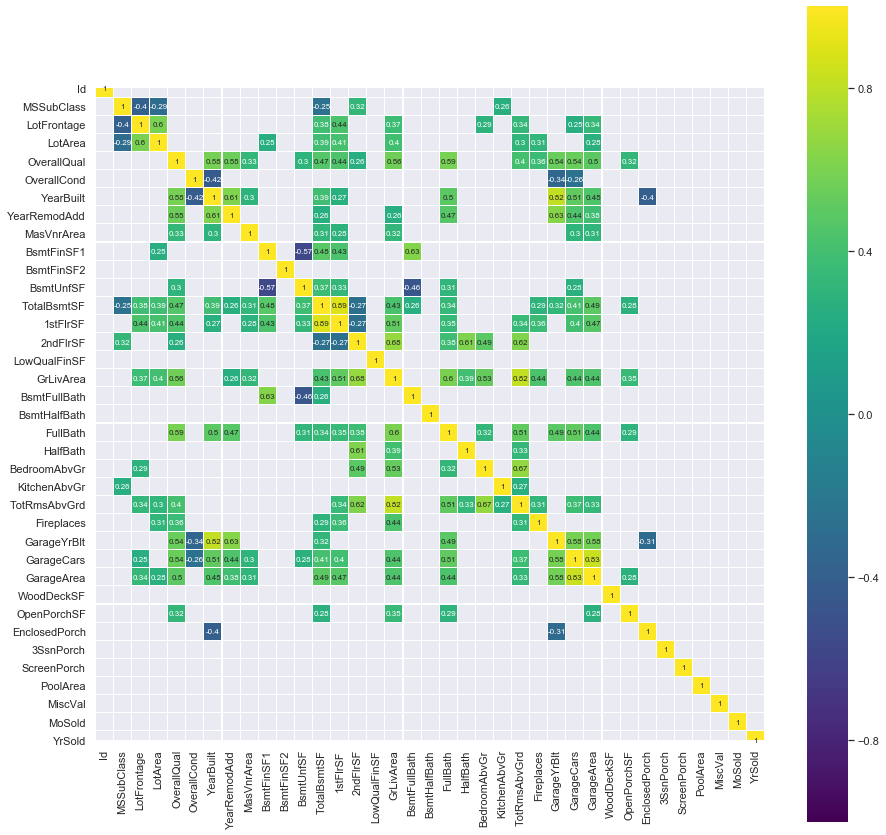

In [19]:
# check correlations between other variable
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr[(abs(corr) >= bord)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [20]:
l_features=list(features.columns)
l_features.append('SalePrice')

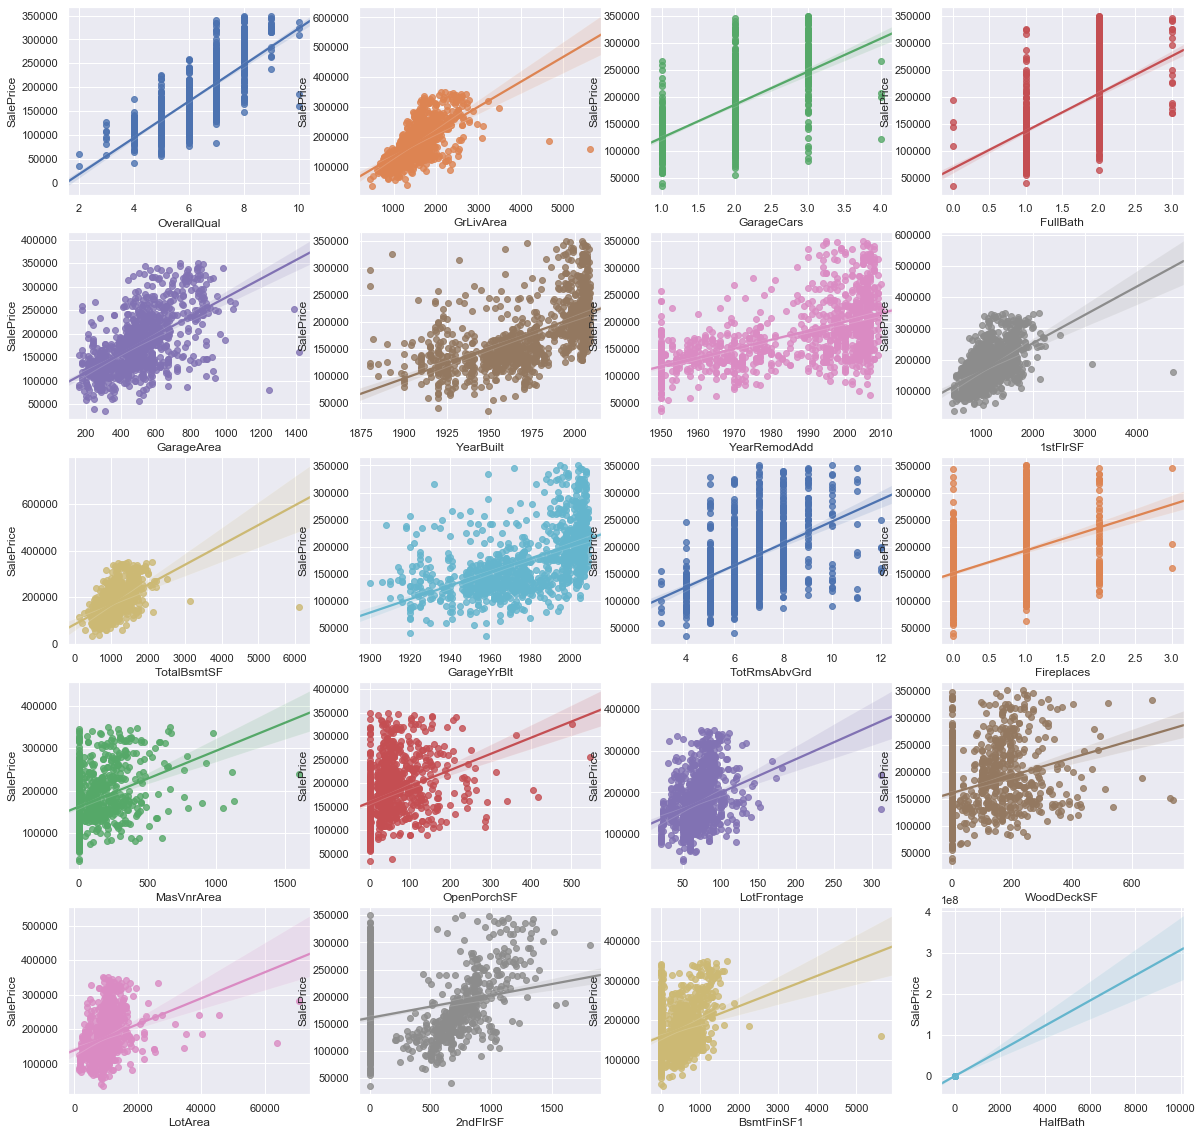

In [21]:
# check correlations of the most important attributes with the target attribute
fig, ax = plt.subplots(round(len(l_features) / 4), 4, figsize = (20, 20))
for i, ax in enumerate(fig.axes):
    if i < len(l_features) - 1:
        sns.regplot(x=l_features[i],y='SalePrice', data=df[l_features], ax=ax)

In [22]:
# preparing data for prediction
y = df['SalePrice']
train = df
del train['SalePrice']
del train['Id']

In [23]:
l_features.remove('SalePrice')

In [24]:
# take the most important features for prediction
train = train[l_features]
X = train.values
y = y.values

In [25]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Train the model (LinearRegression)
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)
preds_val = model.predict(X_test)

In [28]:
print("Mean absolute Error:", mean_absolute_error(y_test, preds_val))

Mean absolute Error: 18960.0085653216


In [29]:
print("MAE in % relation to mean value of prediction:", mean_absolute_error(y_test, preds_val)/y_test.mean()*100)

MAE in % relation to mean value of prediction: 10.697496157075657


In [30]:
print("Accuracy (%):", model.score(X_test, y_test)*100)

Accuracy (%): 83.32686970219117


In [31]:
#Train the model (RandomForestRegressor) and use function for mean error and accuracy assessment
from sklearn.ensemble import RandomForestRegressor

def get_mae_acc(n_estimator, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    acc = model.score(X_test, y_test)*100
    return (mae, acc)

In [32]:
# compare MAE with differing values of max_leaf_nodes and find optimal
opt_acc = 0
opt_max_estims = 0
for n_estim in [100, 200, 500, 1000, 1200]:
    mae, acc = get_mae_acc(n_estim, X_train, X_test, y_train, y_test)
    if acc>opt_acc:
        opt_acc = acc
        opt_max_estims = n_estim
    print("Max estimators: %d \t Mean Absolute Error: %f \t Accuracy: %f" %(n_estim, mae, acc))

Max estimators: 100 	 Mean Absolute Error: 16302.829119 	 Accuracy: 85.483257
Max estimators: 200 	 Mean Absolute Error: 16702.615057 	 Accuracy: 85.004136
Max estimators: 500 	 Mean Absolute Error: 16534.790567 	 Accuracy: 85.165797
Max estimators: 1000 	 Mean Absolute Error: 16526.187874 	 Accuracy: 85.202628
Max estimators: 1200 	 Mean Absolute Error: 16557.937238 	 Accuracy: 85.122310


In [33]:
print("Optimal number of estimators: %d with Accuracy: %0.2f" %(opt_max_estims, opt_acc))

Optimal number of estimators: 100 with Accuracy: 85.48


In [34]:
#Train the model (GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
preds_val = model.predict(X_test)
mae = mean_absolute_error(y_test, preds_val)

In [36]:
print("MAE:", mae)
print("Accuracy:", model.score(X_test, y_test)*100)

MAE: 15816.004952250607
Accuracy: 86.68697052672162


In [39]:
#Train the model (Multi-layer Perceptron)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=100)

model.compile(optimizer='adam',loss='mse')

In [40]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=3000,callbacks=[early_stop], verbose=0)

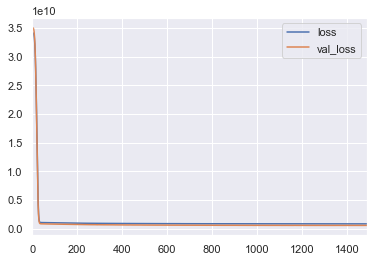

In [41]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [42]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

18663.15143079502

In [43]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions)

0.8387926484294392

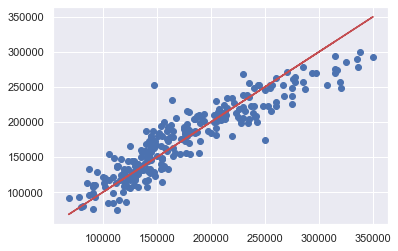

In [44]:
# plotting prediction vs. exact values
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r');

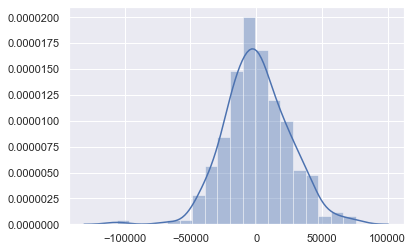

In [45]:
# plotting prediction error distribution
errors = y_test.reshape(261, 1)  - predictions
sns.distplot(errors)